In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df=pd.read_csv("TitanicFinal.csv",sep=';')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df=df.drop("Ticket",axis=1)

In [5]:
df=df.drop("Cabin",axis=1)

In [6]:
df=df.drop("Name",axis=1)

In [7]:
df=df.drop("PassengerId",axis=1)

In [8]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [9]:
df.describe()

Survived       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      0.377387     2.294882    29.881138     0.498854     0.385027   
std       0.484918     0.837836    14.413493     1.041658     0.865560   
min       0.000000     1.000000     0.170000     0.000000     0.000000   
25%       0.000000     2.000000    21.000000     0.000000     0.000000   
50%       0.000000     3.000000    28.000000     0.000000     0.000000   
75%       1.000000     3.000000    39.000000     1.000000     0.000000   
max       1.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

In [10]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})

In [11]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    2  38.0      1      0  71.2833        C
2         1       3    2  26.0      0      0   7.9250        S
3         1       1    2  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [12]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df.dropna(subset=['Parch'], inplace=True)

In [15]:
df.dropna(subset=['Fare'], inplace=True)

In [16]:
df.dropna(subset=['Embarked'], inplace=True)

In [17]:
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
X = df.drop('Survived',axis=1)
y=df['Survived']

In [19]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500       0.0
1       1    2  38.0      1      0  71.2833       1.0
2       3    2  26.0      0      0   7.9250       0.0
3       1    2  35.0      1      0  53.1000       0.0
4       3    1  35.0      0      0   8.0500       0.0

In [20]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
df.tail(10)

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
1299         1       3    2  28.0      0      0    7.7208       2.0
1300         1       3    2   3.0      1      1   13.7750       0.0
1301         1       3    2  28.0      0      0    7.7500       2.0
1302         1       1    2  37.0      1      0   90.0000       2.0
1303         1       3    2  28.0      0      0    7.7750       0.0
1304         0       3    1  28.0      0      0    8.0500       0.0
1305         1       1    2  39.0      0      0  108.9000       1.0
1306         0       3    1  38.5      0      0    7.2500       0.0
1307         0       3    1  28.0      0      0    8.0500       0.0
1308         0       3    1  28.0      1      1   22.3583       1.0

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\pbria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8256880733944955


In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       209
           1       0.74      0.80      0.77       118

    accuracy                           0.83       327
   macro avg       0.81      0.82      0.81       327
weighted avg       0.83      0.83      0.83       327



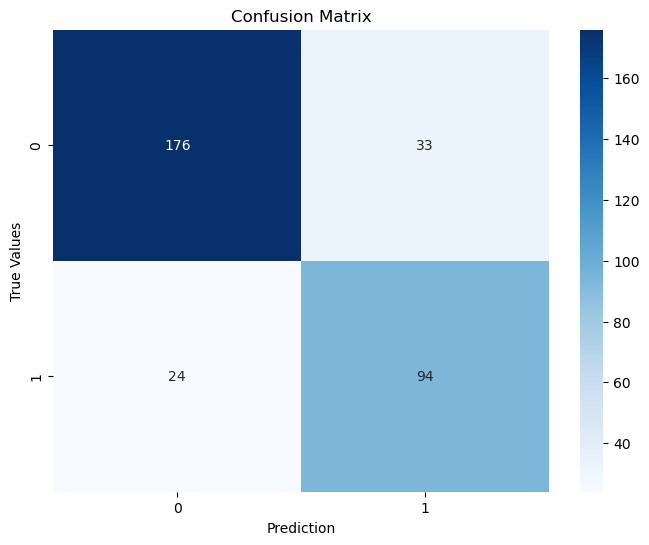

In [27]:
conf_mat=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel("Prediction")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show()

In [28]:
def did_he_survive():
    print("Enter the following informations about a passenger to know if he would have survived")
    Pclass=int(input("Enter the Pclass"))
    Sex=int(input("Enter 1 if he is a male, 2 if she is a female"))
    Age=int(input("Enter the Age"))
    SibSp=int(input("Enter the number of Siblings"))
    Parch=int(input("Enter 0 if he is a parent or 1 if he is a child"))
    Fare=float(input("Enter the fare"))
    Embarked=int(input("Enter 0 if S, 1 if C, 2 if Q"))
                       
    passenger=pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
                       
    survie_predite = model.predict(passenger)
                       
    if survie_predite==1:
        print("Le passager a survecu")
    else : print("Le passager n'a pas Survecu")

In [29]:
did_he_survive()

Enter the following informations about a passenger to know if he would have survived
Enter the Pclass


ValueError: invalid literal for int() with base 10: ''

In [ ]:
did_he_survive()

In [30]:
coefficients = model.coef_[0]
feature_names = X.columns

In [31]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [32]:
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

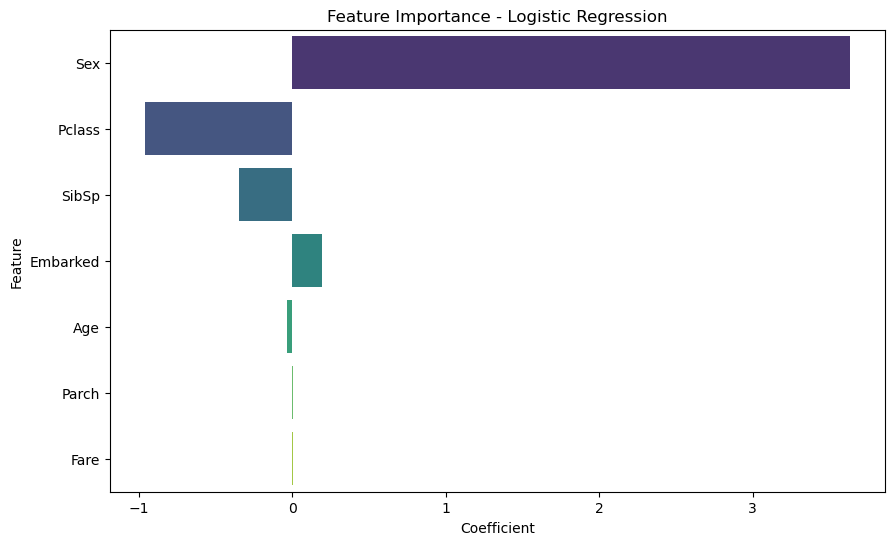

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.show()